# House Pricing

## Problem Statement

We would like to predict the house of a house based on its characteristics.

In [3]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/rezpe/datos_viz/master/house_prices.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Building Gradient Boosting Trees Example with only numeric features

#### first prediction

In [6]:
df.columns[df.dtypes==int64]

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [7]:
X = df[[ 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']]
y = df["SalePrice"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [10]:
pred1 = y_train.mean()

In [11]:
pred1

180327.1704718417

In [12]:
dfr=pd.DataFrame()

In [13]:
dfr["real"]=y_train
dfr["pred1"]=pred1

In [14]:
dfr.head()

,real,pred1
745,299800,180327.170472
247,140000,180327.170472
118,320000,180327.170472
314,178000,180327.170472
532,107500,180327.170472


In [15]:
dfr["resid1"]=dfr["real"]-dfr["pred1"]

In [16]:
dfr.head()

,real,pred1,resid1
745,299800,180327.170472,119472.829528
247,140000,180327.170472,-40327.170472
118,320000,180327.170472,139672.829528
314,178000,180327.170472,-2327.170472
532,107500,180327.170472,-72827.170472


#### prediction 2

In [17]:
# Load the library
from sklearn.tree import DecisionTreeRegressor
# Create an instance
reg2 = DecisionTreeRegressor(max_depth=3)
# Fit the data
reg2.fit(X_train,dfr["resid1"])

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [18]:
dfr["pred2"]=dfr["pred1"]+0.1*reg2.predict(X_train)

In [19]:
dfr.head()

,real,pred1,resid1,pred2
745,299800,180327.170472,119472.829528,193805.411319
247,140000,180327.170472,-40327.170472,174806.903820
118,320000,180327.170472,139672.829528,187088.835616
314,178000,180327.170472,-2327.170472,181732.723695
532,107500,180327.170472,-72827.170472,174806.903820


In [20]:
dfr["resid2"]=dfr["real"]-dfr["pred2"]

In [21]:
dfr.head()

,real,pred1,resid1,pred2,resid2
745,299800,180327.170472,119472.829528,193805.411319,105994.588681
247,140000,180327.170472,-40327.170472,174806.903820,-34806.903820
118,320000,180327.170472,139672.829528,187088.835616,132911.164384
314,178000,180327.170472,-2327.170472,181732.723695,-3732.723695
532,107500,180327.170472,-72827.170472,174806.903820,-67306.903820


#### prediction 3

In [24]:
# Load the library
from sklearn.tree import DecisionTreeRegressor
# Create an instance
reg3 = DecisionTreeRegressor(max_depth=3)
# Fit the data
reg3.fit(X_train,dfr["resid2"])

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [25]:
dfr["pred3"]=dfr["pred1"]+0.1*reg2.predict(X_train)+0.1*reg3.predict(X_train)

In [26]:
dfr["resid3"]=dfr["real"]-dfr["pred3"]

In [27]:
dfr.head()

,real,pred1,resid1,pred2,resid2,pred3,resid3
745,299800,180327.170472,119472.829528,193805.411319,105994.588681,205528.151506,94271.848494
247,140000,180327.170472,-40327.170472,174806.903820,-34806.903820,169901.887200,-29901.887200
118,320000,180327.170472,139672.829528,187088.835616,132911.164384,192429.243852,127570.756148
314,178000,180327.170472,-2327.170472,181732.723695,-3732.723695,182621.040331,-4621.040331
532,107500,180327.170472,-72827.170472,174806.903820,-67306.903820,169901.887200,-62401.887200


In [28]:
pred_test2 = pred1 +0.1*reg2.predict(X_test)+0.1*reg3.predict(X_test)

In [29]:
pred_test1 = pred1 +0.1*reg2.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
np.sqrt(mean_squared_error(y_test,pred_test1))

100327.13960856352

In [32]:
np.sqrt(mean_squared_error(y_test,pred_test2))

95243.80963162941

## Gradient Boosting Regressor is the phases we did before

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
reg = GradientBoostingRegressor(max_depth=4, n_estimators=100,learning_rate=0.1)

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg,X,y,scoring="neg_mean_absolute_error").mean()

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


-16729.77308718147

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
reg = GridSearchCV(GradientBoostingRegressor(n_estimators=50),
                  param_grid={"max_depth":np.arange(2,10),
                             "learning_rate":np.arange(1,10)/10},
                  scoring="neg_mean_absolute_error",
                  cv=5)

In [42]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [46]:
reg.best_params_

{'learning_rate': 0.1, 'max_depth': 4}

In [44]:
# max_depth=4
# learning_rate = 0.1

## Feature Preprocessing

## Outlier

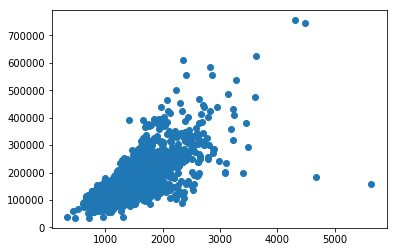

In [47]:
plt.scatter(df["GrLivArea"],df["SalePrice"])

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

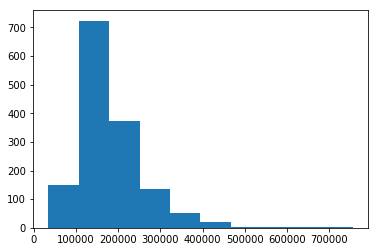

In [48]:
plt.hist(df["SalePrice"])

In [49]:
df = df[df["GrLivArea"]<4000]

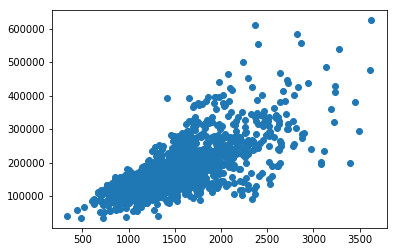

In [50]:
plt.scatter(df["GrLivArea"],df["SalePrice"])

## Transforming the output value

(array([ 96., 539., 445., 211.,  96.,  37.,  20.,   6.,   3.,   3.]),
 array([ 34900.,  93910., 152920., 211930., 270940., 329950., 388960.,
        447970., 506980., 565990., 625000.]),
 <a list of 10 Patch objects>)

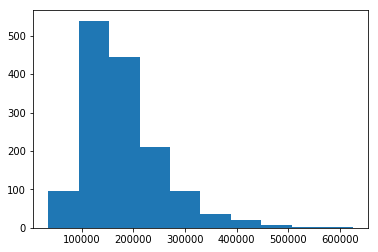

In [51]:
plt.hist(df["SalePrice"])

In [52]:
df["SalePrice"]=np.log1p(df["SalePrice"])

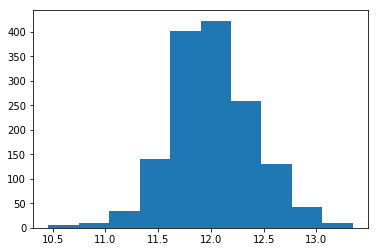

In [53]:
plt.hist(df["SalePrice"]);

In [54]:
len(df.columns)

81

## Missing Values

In [55]:
df.columns[df.isnull().sum()!=0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [56]:
# Missing means none
for col in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu",
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
           'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
           "MasVnrType",
           'MSSubClass']:
    df[col]=df[col].fillna("None")

In [57]:
# Missing means 0
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars',
           'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
           "MasVnrArea"]:
    df[col]=df[col].fillna(0)

In [58]:
df.columns[df.isnull().sum()!=0]

Index(['LotFrontage', 'Electrical'], dtype='object')

In [59]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,12.429220
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,11.870607
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,12.634606
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,12.206078
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,11.774528
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,11.678448


In [60]:
df["LotFrontage"]=df.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))



In [61]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,12.429220
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,11.870607
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,12.634606
7,8,60,RL,80.0,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,12.206078
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,11.774528
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,11.678448


In [62]:
df["Electrical"]=df["Electrical"].fillna(df["Electrical"].mode()[0])

In [63]:
df.columns[df.isnull().sum()!=0]

Index([], dtype='object')

## Scaling Variables

In [83]:
from sklearn.preprocessing import RobustScaler

In [84]:
rbs = RobustScaler()

In [85]:
X = df[[ 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']]

In [92]:
X_scale = rbs.fit_transform(X)

In [93]:
X[:5]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008


In [97]:
X_scale.std()

93.46985769427407

## CAtegorical Features

In [98]:
dfb = pd.get_dummies(df)

In [99]:
len(df.columns)

81

In [100]:
len(dfb.columns)

303

In [101]:
dfb.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [102]:
df["SaleCondition"].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [103]:
df[df["SaleCondition"]=='Partial']["SalePrice"].mean()

12.45386499916424

In [104]:
dfb = pd.get_dummies(df)

In [105]:
X=dfb[list(set(dfb.columns)-set(["Id","SalePrice"]))]

In [106]:
y=dfb["SalePrice"]

## Pipelines

In [107]:
rbs = RobustScaler()

In [108]:
X_scaled = rbs.fit_transform(X)

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
reg = RandomForestRegressor(max_depth=4)

In [111]:
cross_val_score(reg,X_scaled,y,scoring="neg_mean_absolute_error")

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([-0.14210354, -0.12476481, -0.12210185])

In [112]:
from sklearn.pipeline import Pipeline

In [113]:
pipe = Pipeline(steps=[("scaled",RobustScaler()),("rf",RandomForestRegressor(max_depth=4))])

In [114]:
cross_val_score(pipe,X,y,scoring="neg_mean_absolute_error")

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([-0.13429808, -0.12685853, -0.12781061])

In [115]:
import pickle

In [116]:
pickle.dump(pipe,open("pipe.pkl","wb"))

In [117]:
reg.fit(X,y)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Feature Importances

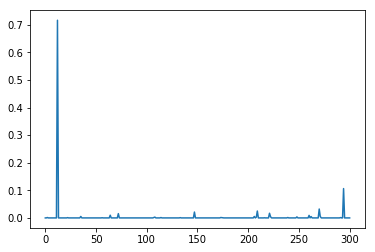

In [118]:
plt.plot(reg.feature_importances_)

In [119]:
X.columns[reg.feature_importances_>0.01]

Index(['OverallQual', '1stFlrSF', 'GarageCars', 'GarageArea', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea'],
      dtype='object')